In [1]:
!pip install statsmodels arch --break-system-packages

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/torchtext-0.18.0a0+9bed85d-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/torchaudio-2.6.0a0+d883142-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/looseversion-1.3.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/opt_einsum-3.4.0-py3.12

In [2]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.regression import linear_model
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

In [3]:
df = pd.read_csv('./data/air_quality_uci.csv')
df.head()

,Date,Time,CO,PT08_S1,NMHC,C6H6,PT08_S2,NOx,PT08_S3,NO2,PT08_S4,PT08_S5,T,RH,AH
0,2005-02-16,17:00:00,1.6,1083,-200,7.0,856,252,720,148,1010,975,8.2,41.8,0.4563
1,2005-02-16,18:00:00,2.2,1143,-200,9.5,960,313,641,153,1110,1136,7.4,44.5,0.4582
2,2005-02-16,19:00:00,3.4,1288,-200,15.9,1178,433,539,171,1300,1434,7.0,43.4,0.4366
3,2005-02-16,20:00:00,5.6,1464,-200,24.7,1421,611,457,227,1542,1746,6.6,43.4,0.4241
4,2005-02-16,21:00:00,5.2,1341,-200,16.8,1204,626,534,251,1294,1592,5.9,44.3,0.4137


In [4]:
df['DateTime'] =df['Date']+' '+df['Time']

In [5]:
df['DateTimeIndex'] = pd.to_datetime(df['DateTime'])

In [6]:
df = df.set_index(keys=['DateTimeIndex'])

In [7]:
train_tatio = 0.9
n = len(df)
n_train = int(n*train_tatio)
df_train = df[:n_train]
df_test = df[n_train:]

In [8]:
features = ['T', 'AH']
target = 'PT08_S4'
X_tn = df_train[features]
y_tn = df_train[target]
X_te = df_test[features]
y_te = df_test[target]

In [9]:
X_train = X_tn.asfreq('H')
y_train = y_tn.asfreq('H')
X_test = X_te.asfreq('H')
y_test = y_te.asfreq('H')

/tmp/ipykernel_31679/845110057.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  X_train = X_tn.asfreq('H')
/tmp/ipykernel_31679/845110057.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  y_train = y_tn.asfreq('H')
/tmp/ipykernel_31679/845110057.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  X_test = X_te.asfreq('H')
/tmp/ipykernel_31679/845110057.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  y_test = y_te.asfreq('H')


In [10]:
y_test

DateTimeIndex
2005-03-26 05:00:00    1309
2005-03-26 06:00:00    1293
2005-03-26 07:00:00    1325
2005-03-26 08:00:00    1458
2005-03-26 09:00:00    1522
                       ... 
2005-03-30 04:00:00    1073
2005-03-30 05:00:00    1109
2005-03-30 06:00:00    1164
2005-03-30 07:00:00    1457
2005-03-30 08:00:00    1533
Freq: h, Name: PT08_S4, Length: 100, dtype: int64

In [11]:
sarimax = ARIMA(endog=y_train, exog=X_train, order=(1,1,0), seasonal_order=(0,1,1,24))
sarmax_fix = sarimax.fit()
sarmax_fix

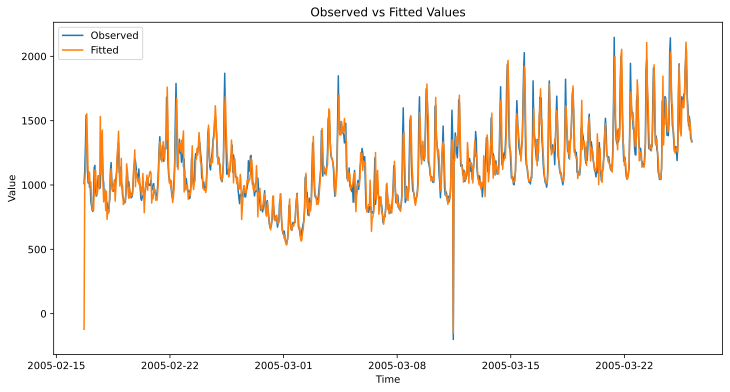

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label='Observed')
plt.plot(y_train.index, sarmax_fix.fittedvalues, label='Fitted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Observed vs Fitted Values')
plt.legend()
plt.show()

In [14]:
garch = arch_model(y_train, vol='GARCH', p=15, q=15)
garch_fit = garch.fit()
garch_fit

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.674e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     34,   Neg. LLF: 6179.791494396686
Iteration:      2,   Func. Count:     67,   Neg. LLF: 6123.40636648561
Iteration:      3,   Func. Count:    101,   Neg. LLF: 6749.096116571438
Iteration:      4,   Func. Count:    137,   Neg. LLF: 7870.000894397199
Iteration:      5,   Func. Count:    172,   Neg. LLF: 6110.218609647849
Iteration:      6,   Func. Count:    206,   Neg. LLF: 6103.988658439501
Iteration:      7,   Func. Count:    239,   Neg. LLF: 6102.165535540645
Iteration:      8,   Func. Count:    272,   Neg. LLF: 6115.985505484865
Iteration:      9,   Func. Count:    306,   Neg. LLF: 6096.985025694135
Iteration:     10,   Func. Count:    339,   Neg. LLF: 6086.195972183937
Iteration:     11,   Func. Count:    372,   Neg. LLF: 6080.357257749245
Iteration:     12,   Func. Count:    405,   Neg. LLF: 6080.001391151953
Iteration:     13,   Func. Count:    439,   Neg. LLF: 6076.552455349642
Iteration:     14,   Func. Count:    472,   Neg. LLF: 6076.694725

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                PT08_S4   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6076.47
Distribution:                  Normal   AIC:                           12216.9
Method:            Maximum Likelihood   BIC:                           12370.6
                                        No. Observations:                  900
Date:                Tue, Mar 25 2025   Df Residuals:                      899
Time:                        06:02:17   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          1068.4893     14.313     74.651      0.000 [1.

In [13]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2)

In [14]:
dbs.fit(X)
label_dbs = dbs.labels_

In [15]:
label_dbs

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(X, label_dbs)

0.32847820126315047

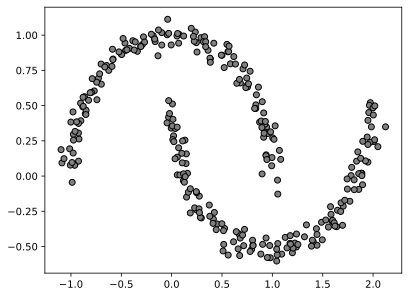

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='grey', edgecolor='black', marker='o')
plt.show()

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=2)


In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)
label_gmm = gmm.predict(X)

In [5]:
label_gmm

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0])

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import silhouette_score
df = pd.read_csv('./data/wine_data.csv')
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [4]:
X=df[['Alcohol']]
clf = svm.OneClassSVM(gamma='auto', nu=0.5)
clf.fit(X)
pred_svm = clf.predict(X)
sil_score = silhouette_score(X, pred_svm)

In [5]:
sil_score

0.0986864660690129

In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.metrics import silhouette_score
df = pd.read_csv('./data/wine_data.csv')
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [3]:
X=df[['Alcohol','Magesium']]
clf = LocalOutlierFactor(n_neighbors=3)
pred_out = clf.fit_predict(X)
pred_out

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [4]:
silhouette_score(X, pred_out)

0.11619572405864302

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import pandas as pd
df = pd.read_csv('./data/wine_data.csv')
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [3]:
X=df[['Alcohol','Magesium']]
clf = IsolationForest(random_state=0)
clf.fit(X)
pred_iso = clf.predict(X)
pred_iso

array([-1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [4]:
silhouette_score(X, pred_iso)

0.42334805508046636

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
df = pd.read_csv('./data/wine_data.csv')
df
features = ['Alcohol',	'Malic',	'Ash',	'Alcalinity',	'Magesium',	'Phenols',	'Flavanoids',	'Nonflavanoids',	'Proanthocyanins',	'Color',	'Hue',	'Dilution',	'Proline']
X= df[features]
y = df['class']
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_tn_pca, y_tn)
pred_out = clf.predict(X_te_std)
pred_out


array([1, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1,
       1])

In [11]:
accuracy_score(y_te, pred_out)

0.37777777777777777

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
df = pd.read_csv('./data/wine_data.csv')
df
features = ['Alcohol',	'Malic',	'Ash',	'Alcalinity',	'Magesium',	'Phenols',	'Flavanoids',	'Nonflavanoids',	'Proanthocyanins',	'Color',	'Hue',	'Dilution',	'Proline']
X= df[features]
y = df['class']
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_tn_std, y_tn)
pred_lda = lda.predict(X_te_std)

In [3]:
accuracy_score(y_te, pred_lda)

0.9777777777777777